In [18]:
%load_ext autoreload
%autoreload 2
%load_ext jupyter_black

# Bertopic Analysis

### Load Data

In [19]:
import pandas as pd

data = pd.read_csv("../data/toxic_companys_brasil.csv")

### Process Data

In [20]:
data = data.fillna("")

In [21]:
data.shape

(6558, 6)

In [22]:
data["Reason"] = data["Reason"].apply(str)
data = data[data["Reason"].apply(lambda x: len(x.split(" ")) > 5)]
documents = data["Reason"].tolist()

In [23]:
import nltk

nltk.download("stopwords")
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /home/letrus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
from bertopic import BERTopic
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import CountVectorizer

SEED = 42
# remove some
vectorizer_model = CountVectorizer(
    stop_words=stopwords.words("portuguese")
    + stopwords.words("english")
    + [
        "pra",
        "nada",
        "cu",
        "dá",
        "todo",
        "tudo",
        "embora",
        "pessoa",
        "ter",
        "vc",
        "vai",
        "fica",
    ]
)
cluster_model = KMeans(n_clusters=10, random_state=SEED)

topic_model = BERTopic(
    hdbscan_model=cluster_model,
    top_n_words=4,
    language="portuguese",
    vectorizer_model=vectorizer_model,
)

In [25]:
topics, probs = topic_model.fit_transform(documents)

In [28]:
%matplotlib inline
topic_model.visualize_topics()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'customdata': array([[0, 'empresa | pessoas | liderança | gestão', 1024],
                                   [1, 'empresa | funcionários | gestão | falta', 1008],
                                   [2, 'empresa | ceo | funcionários | dono', 889],
                                   [3, 'assédio | moral | tóxica | ambiente', 774],
                                   [4, 'salário | empresa | pagam | pj', 676],
                                   [5, 'horas | dia | hora | trabalhar', 448],
                                   [6, 'saúde | funcionários | trabalho | burnout', 432],
                                   [7, 'empresa | demissão | trabalhei | sofri', 345],
                                   [8, 'mulheres | empresa | assédio | diversidade', 342],
                                   [9, 'comando | escolta | azeda | nao', 56]], dtype=object),
              'hovertemplate': '<b>Topic %{customdata[0]}</b><br>%{customdata[1]}<br>Size: %{customdata[2]}',
              'legendgroup': '',
              'marker': {'color': '#B0BEC5',
                         'line': {'color': 'DarkSlateGrey', 'width': 2},
                         'size': array([1024, 1008,  889,  774,  676,  448,  432,  345,  342,   56]),
                         'sizemode': 'area',
                         'sizeref': 0.64,
                         'symbol': 'circle'},
              'mode': 'markers',
              'name': '',
              'orientation': 'v',
              'showlegend': False,
              'type': 'scatter',
              'x': array([1.8581388, 7.3189282, 1.7193937, 3.5097764, 7.8199954, 8.28444  ,
                          2.6942768, 2.8841116, 4.03315  , 1.8895656], dtype=float32),
              'xaxis': 'x',
              'y': array([1.7072784 , 4.698617  , 0.97704154, 2.3474057 , 5.063418  , 5.446192  ,
                          2.0998378 , 1.580034  , 2.1764991 , 0.45381802], dtype=float32),
              'yaxis': 'y'}],
    'layout': {'annotations': [{'showarrow': False,
                                'text': 'D1',
                                'x': 1.461484670639038,
                                'y': 3.3244329378008843,
                                'yshift': 10},
                               {'showarrow': False,
                                'text': 'D2',
                                'x': 5.494295358657837,
                                'xshift': 10,
                                'y': 6.263120555877686}],
               'height': 650,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'itemsizing': 'constant', 'tracegroupgap': 0},
               'margin': {'t': 60},
               'shapes': [{'line': {'color': '#CFD8DC', 'width': 2},
                           'type': 'line',
                           'x0': 5.494295358657837,
                           'x1': 5.494295358657837,
                           'y0': 0.38574531972408294,
                           'y1': 6.263120555877686},
                          {'line': {'color': '#9E9E9E', 'width': 2},
                           'type': 'line',
                           'x0': 1.461484670639038,
                           'x1': 9.527106046676636,
                           'y0': 3.3244329378008843,
                           'y1': 3.3244329378008843}],
               'sliders': [{'active': 0,
                            'pad': {'t': 50},
                            'steps': [{'args': [{'marker.color': [['red',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                                                                  '#B0BEC5',
                      

In [29]:
%matplotlib inline
topic_model.visualize_heatmap()

ValueError: Mime type rendering requires nbformat>=4.2.0 but it is not installed

Figure({
    'data': [{'coloraxis': 'coloraxis',
              'hovertemplate': 'x: %{x}<br>y: %{y}<br>Similarity Score: %{z}<extra></extra>',
              'name': '0',
              'type': 'heatmap',
              'x': [0_empresa_pessoas_liderança, 1_empresa_funcionários_gestão,
                    2_empresa_ceo_funcionários, 3_assédio_moral_tóxica,
                    4_salário_empresa_pagam, 5_horas_dia_hora,
                    6_saúde_funcionários_trabalho, 7_empresa_demissão_trabalhei,
                    8_mulheres_empresa_assédio, 9_comando_escolta_azeda],
              'xaxis': 'x',
              'y': [0_empresa_pessoas_liderança, 1_empresa_funcionários_gestão,
                    2_empresa_ceo_funcionários, 3_assédio_moral_tóxica,
                    4_salário_empresa_pagam, 5_horas_dia_hora,
                    6_saúde_funcionários_trabalho, 7_empresa_demissão_trabalhei,
                    8_mulheres_empresa_assédio, 9_comando_escolta_azeda],
              'yaxis': 'y',
              'z': array([[1.0000002 , 0.9171432 , 0.89545584, 0.8741327 , 0.819145  ,
                           0.7309431 , 0.9103827 , 0.72129947, 0.82630247, 0.4241422 ],
                          [0.9171432 , 1.0000001 , 0.8719214 , 0.7540588 , 0.88971466,
                           0.7875565 , 0.86805695, 0.7405147 , 0.71287477, 0.34480298],
                          [0.89545584, 0.8719214 , 1.0000001 , 0.8157543 , 0.79760075,
                           0.7708572 , 0.84275436, 0.78442764, 0.7879504 , 0.42575616],
                          [0.8741327 , 0.7540588 , 0.8157543 , 1.0000005 , 0.69614863,
                           0.64521515, 0.8847875 , 0.71832067, 0.83628833, 0.3833968 ],
                          [0.819145  , 0.88971466, 0.79760075, 0.69614863, 0.9999995 ,
                           0.8694682 , 0.8671681 , 0.730268  , 0.66772157, 0.32870966],
                          [0.7309431 , 0.7875565 , 0.7708572 , 0.64521515, 0.8694682 ,
                           1.0000002 , 0.83182114, 0.73889154, 0.5836407 , 0.33524612],
                          [0.9103827 , 0.86805695, 0.84275436, 0.8847875 , 0.8671681 ,
                           0.83182114, 1.0000004 , 0.787459  , 0.7880595 , 0.37286142],
                          [0.72129947, 0.7405147 , 0.78442764, 0.71832067, 0.730268  ,
                           0.73889154, 0.787459  , 0.99999976, 0.649643  , 0.25273323],
                          [0.82630247, 0.71287477, 0.7879504 , 0.83628833, 0.66772157,
                           0.5836407 , 0.7880595 , 0.649643  , 0.9999997 , 0.32818478],
                          [0.4241422 , 0.34480298, 0.42575616, 0.3833968 , 0.32870966,
                           0.33524612, 0.37286142, 0.25273323, 0.32818478, 1.0000001 ]],
                         dtype=float32)}],
    'layout': {'coloraxis': {'colorbar': {'title': {'text': 'Similarity Score'}},
                             'colorscale': [[0.0, 'rgb(247,252,240)'], [0.125,
                                            'rgb(224,243,219)'], [0.25,
                                            'rgb(204,235,197)'], [0.375,
                                            'rgb(168,221,181)'], [0.5,
                                            'rgb(123,204,196)'], [0.625,
                                            'rgb(78,179,211)'], [0.75,
                                            'rgb(43,140,190)'], [0.875,
                                            'rgb(8,104,172)'], [1.0,
                                            'rgb(8,64,129)']]},
               'height': 800,
               'hoverlabel': {'bgcolor': 'white', 'font': {'family': 'Rockwell', 'size': 16}},
               'legend': {'title': {'text': 'Trend'}},
               'margin': {'t': 60},
               'showlegend': True,
               'template': '...',
               'title': {'font': {'color': 'Black', 'size': 22},
                         'text': '<b>Similarity Matrix</b>',
                         'x': 0.55,
                         'xanchor'

In [30]:
topics_words_list = []
for topic in topics:
    topics_words_list.append(topic_model.get_topic(topic))

In [31]:
topics_words = []
for i in topic_model.get_topics():
    words = topic_model.get_topic(i)
    words_string = ", ".join([w[0] for w in words[:10]])
    topics_words.append(words_string)

In [32]:
topics_words

['empresa, pessoas, liderança, gestão',
 'empresa, funcionários, gestão, falta',
 'empresa, ceo, funcionários, dono',
 'assédio, moral, tóxica, ambiente',
 'salário, empresa, pagam, pj',
 'horas, dia, hora, trabalhar',
 'saúde, funcionários, trabalho, burnout',
 'empresa, demissão, trabalhei, sofri',
 'mulheres, empresa, assédio, diversidade',
 'comando, escolta, azeda, nao']

In [33]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

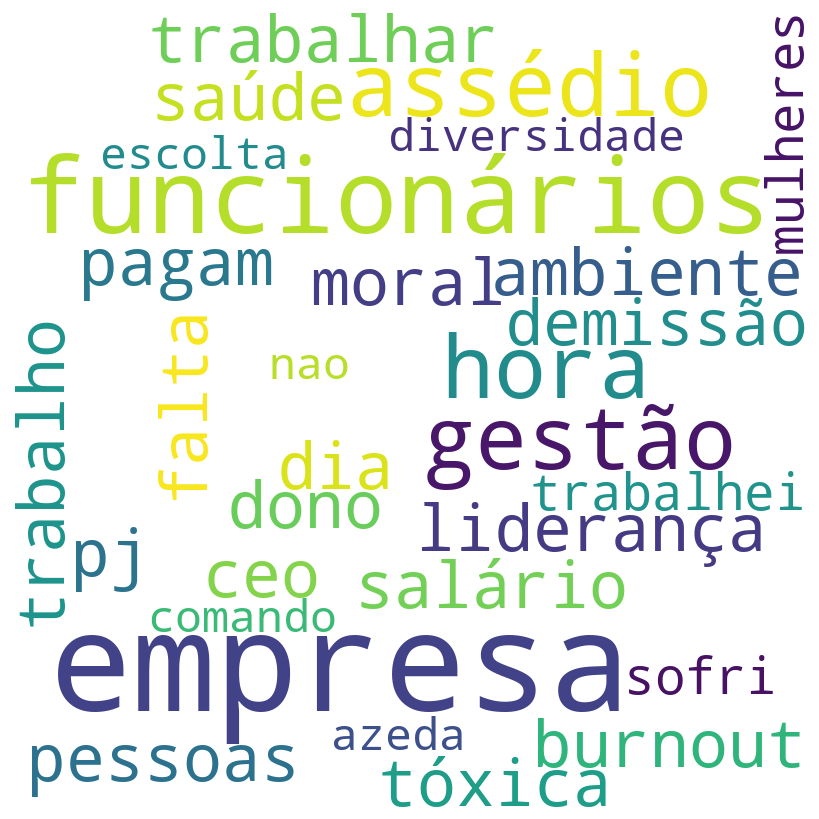

In [35]:
text = ", ".join(topics_words)

# Generate the word cloud
wordcloud = WordCloud(
    width=800, height=800, background_color="white", stopwords=[], min_font_size=10
).generate(text)

# Plot the WordCloud image
plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
# save as image
plt.savefig("../images/wordcloud.png")
plt.show()